#### References:
1. [On discriminative vs generative classifiers](https://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf)
2. Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P. and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E. *Scikit-learn: Machine Learning in Python*.
3. Dua, D. and Karra Taniskidou, E. (2017). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# generate 'm vs rest' train-test split ensuring atleast 1 sample of each class in both splits
def split(data, m):
    train_pct = float(m) / data.shape[0]
    while True:
        train, test = train_test_split(data, train_size=train_pct)
        s = np.sum(train[:, -1])
        if not (s == 0 or s == train.shape[0]):
            return train, test


# Multinomial Naive Bayes for discrete data
def fitMNB(data, m, n, l=1):
    err = []
    for i in range(n):
        clf = MultinomialNB(l) 
        train, test = split(data, m)
        clf.fit(train[:, :-1], train[:, -1])
        err.append(1 - clf.score(test[:, :-1], test[:, -1]))
    return np.mean(np.asarray(err))

# Gaussian Naive Bayes for continuous data
def fitGNB(data, m, n, eps=1e-2):
    err = []
    for i in range(n):
        clf = GaussianNB() 
        train, test = split(data, m)
        clf.fit(train[:, :-1], train[:, -1])
        clf.sigma_ = clf.sigma_ + eps # add epsilon to diagonal covariances 
        err.append(1 - clf.score(test[:, :-1], test[:, -1]))
    return np.mean(np.asarray(err))

# Logistic regression without regularization
def fitLogReg(data, m, n):
    err = []
    for i in range(n):
        clf = LogisticRegression(C=1e10, n_jobs=-1) # setting C to a very large value to remove effect of regularization
        train, test = split(data, m)
        clf.fit(train[:, :-1], train[:, -1])
        err.append(1 - clf.score(test[:, :-1], test[:, -1]))
    return np.mean(np.asarray(err))

# Logistic regression, 5 fold cross validated
def fitLogRegPen(data, m, n):
    err = []
    for i in range(n):
        clf = LogisticRegressionCV(cv=5, n_jobs=-1) 
        train, test = split(data, m)
        clf.fit(train[:, :-1], train[:, -1])
        err.append(1 - clf.score(test[:, :-1], test[:, -1]))
    return np.mean(np.asarray(err))


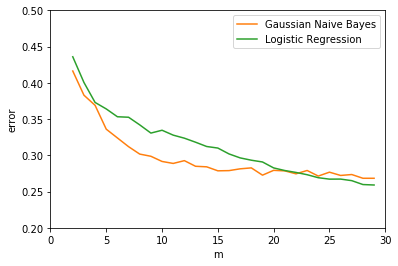

In [4]:
# dataset : adult (continuous)
errors = {
    'gnb' : [],
    'logreg' : []
}

data = np.load('data/adult_continuous.npy')

for m in range(2, 30):
    errors['gnb'].append(fitGNB(data, m, 1000, 1e-5))
    errors['logreg'].append(fitLogReg(data, m, 1000))
    
xes = range(2, 30)
plt.plot(xes, errors['gnb'], 'C1', label='Gaussian Naive Bayes')
plt.plot(xes, errors['logreg'], 'C2', label='Logistic Regression')
plt.ylabel('error')
plt.xlabel('m')
plt.axis([0, 30, 0.2, 0.5])
plt.legend()
plt.show()

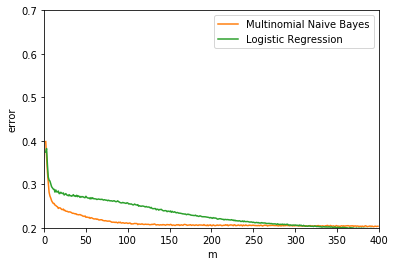

In [5]:
# dataset : adult (discrete)
errors = {
    'mnb' : [],
    'logreg' : []
}

data = np.load('data/adult_dicrete.npy')

for m in range(2, 400):
    errors['mnb'].append(fitMNB(data, m, 1000))
    errors['logreg'].append(fitLogReg(data, m, 1000))

xes = range(2, 400)
plt.plot(xes, errors['mnb'], 'C1', label='Multinomial Naive Bayes')
plt.plot(xes, errors['logreg'], 'C2', label='Logistic Regression')
plt.ylabel('error')
plt.xlabel('m')
plt.axis([0, 400, 0.2, 0.7])
plt.legend()
plt.show()

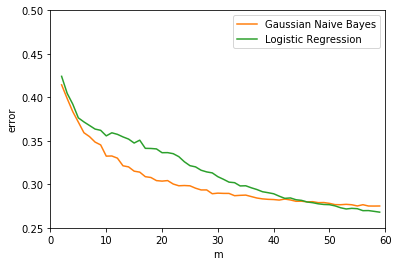

In [4]:
# dataset : pima (continuous)
errors = {
    'gnb' : [],
    'logreg' : []
}

data = np.load('data/pima.npy')

for m in range(2, 60):
    errors['gnb'].append(fitGNB(data, m, 1000, 1e-2))
    errors['logreg'].append(fitLogReg(data, m, 1000))
    
xes = range(2, 60)
plt.plot(xes, errors['gnb'], 'C1', label='Gaussian Naive Bayes')
plt.plot(xes, errors['logreg'], 'C2', label='Logistic Regression')
plt.ylabel('error')
plt.xlabel('m')
plt.axis([0, 60, 0.25, 0.5])
plt.legend()
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


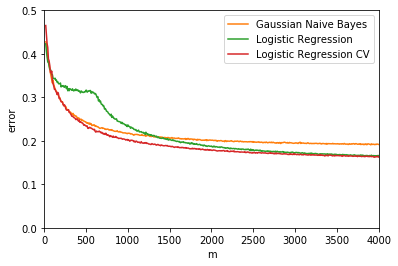

In [5]:
# dataset : synthetic (continuous)
errors = {
    'gnb' : [],
    'logreg' : [],
    'logregpen' : []
}

data = np.load('data/large_synthetic.npy')

ms = np.linspace(20, 4000, num=500)
for m in ms:
    errors['gnb'].append(fitGNB(data, m, 50, 5e-3))
    errors['logreg'].append(fitLogReg(data, m, 50))
    errors['logregpen'].append(fitLogRegPen(data, m, 50))
    
xes = ms
plt.plot(xes, errors['gnb'], 'C1', label='Gaussian Naive Bayes')
plt.plot(xes, errors['logreg'], 'C2', label='Logistic Regression')
plt.plot(xes, errors['logregpen'], 'C3', label='Logistic Regression CV')
plt.ylabel('error')
plt.xlabel('m')
plt.axis([0, 4000, 0, 0.5])
plt.legend()
plt.show()